<a href="https://colab.research.google.com/github/BrunoMog/Computa-o-Quantica/blob/main/C%C3%B3pia_ALTERADA_de_Expressibility_and_Entanglement_Capability_of_the_Parameterized_Quantum_Circuits_Bruno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://obliviateandsurrender.github.io/blogs/expr.html

In [1]:
%pip install sympy

In [2]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=28895e45caf93dbaf4cea7a089b2db7c1a4c6e7ccbdb5acc963933e726772fc9
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [3]:
!pip install qiskit==0.46.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 9.2 MB/s eta 0:00:00


In [7]:
!pip install qiskit-aer==0.12.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 99.4 MB/s eta 0:00:00


In [8]:
import numpy as np
#from qiskit import *
import scipy as sp
from qiskit import QuantumCircuit, transpile
#Instead of importing from qiskit_aer directly, import from the simulator module.
from qiskit_aer import Aer
from qiskit_aer import AerSimulator # Importing the AerSimulator to be used with the execute function.
import qiskit
from qiskit.quantum_info import Statevector, partial_trace
from qiskit import execute
from qiskit import BasicAer

from tqdm import tqdm


# Função para gerar os circuitos escolhidos

  todos os circuitos recebem os parâmetros em um numpy array, unidimensional e com valores de parâmetos diferentes

######  ansatz1 = 4 parâmetros
######  ansatz2 = 8 parâmetros
######  ansatz3 = 28 parâmetros
######  ansatz4 = 28 parâmetros
######  ansatz5 = 11 parâmetros
######  ansatz6 = 12 parâmetros
######  ansatz7 = 11 parâmetros
######  ansatz8 = 8 parâmetros
######  ansatz9 = 12 parâmetros
######  ansatz10 = 12 parâmetros


In [9]:
# os 10 circuitos escolhidos

#todos os circuitos tem 4 qubits
num_qubits = 4

"""
todos os circuitos recebem os parâmetros em um numpy array, unidimensional e com valores de parâmetos diferentes

ansatz1 = 4 parâmetros
ansatz2 = 8 parâmetros
ansatz3 = 28 parâmetros
ansatz4 = 28 parâmetros
ansatz5 = 11 parâmetros
ansatz6 = 12 parâmetros
ansatz7 = 11 parâmetros
ansatz8 = 4 parâmetros
ansatz9 = 12 parâmetros
ansatz10 = 12 parâmetros

"""
# o primeiro circuito particularmente, tem a maior métrica de espressibilidade e emaranhamento, o circuito 9
def ansatz1(params):


    ansatz = QuantumCircuit(num_qubits, num_qubits)

    # aplicar Hadamard a todos os qubits
    ansatz.h([0, 1, 2, 3])


    # cnot em todos os quibits
    ansatz.cz(2, 3)
    ansatz.cz(1, 2)
    ansatz.cz(0, 1)

    #rx em todas as portas
    for idx in range(num_qubits):

      ansatz.rx(params[idx], idx)


    return ansatz

# o segundo circuito, alta expressibilidade e baixo emaranhamento, o circuito 1
def ansatz2(params):

    params = params.reshape(2, 4)

    ansatz = QuantumCircuit(num_qubits, num_qubits)

    for i in range(num_qubits):

      ansatz.rx(params[0][i], i)

    for i in range(num_qubits):

      ansatz.rz(params[1][i], i)


    return ansatz


# o terceiro circuito, baixa expressibilidade e baixo emaranhamento, o circuito 5
def ansatz3(params):

    rx1 = params[:4]
    rz1 = params[4:8]
    crz = params[8:20]
    rx2 = params[20:24]
    rz2 = params[24:28]

    ansatz = QuantumCircuit(num_qubits, num_qubits)

    for i in range(num_qubits):

      ansatz.rx(rx1[i], i)

    for i in range(num_qubits):

      ansatz.rz(rz1[i], i)

    # portas de controle de rotação no eixo z

    ansatz.crz(crz[0], 3, 2)
    ansatz.crz(crz[1], 3, 1)
    ansatz.crz(crz[2], 3, 0)
    ansatz.crz(crz[3], 2, 3)
    ansatz.crz(crz[4], 2, 1)
    ansatz.crz(crz[5], 2, 0)
    ansatz.crz(crz[6], 1, 3)
    ansatz.crz(crz[7], 1, 2)
    ansatz.crz(crz[8], 1, 0)
    ansatz.crz(crz[9], 0, 3)
    ansatz.crz(crz[10], 0, 2)
    ansatz.crz(crz[11], 0, 1)

    for i in range(num_qubits):

      ansatz.rx(rx2[i], i)

    for i in range(num_qubits):

      ansatz.rz(rz2[i], i)

    return ansatz

# o quart circuito, baixa expressibilidade e alto emaranhamento, o circuito 6
def ansatz4(params):

    rx1 = params[:4]
    rz1 = params[4:8]
    crx = params[8:20]
    rx2 = params[20:24]
    rz2 = params[24:28]

    ansatz = QuantumCircuit(num_qubits, num_qubits)

    for i in range(num_qubits):

      ansatz.rx(rx1[i], i)

    for i in range(num_qubits):

      ansatz.rz(rz1[i], i)

    # portas de controle de rotação no eixo x

    ansatz.crx(crx[0], 3, 2)
    ansatz.crx(crx[1], 3, 1)
    ansatz.crx(crx[2], 3, 0)
    ansatz.crx(crx[3], 2, 3)
    ansatz.crx(crx[4], 2, 1)
    ansatz.crx(crx[5], 2, 0)
    ansatz.crx(crx[6], 1, 3)
    ansatz.crx(crx[7], 1, 2)
    ansatz.crx(crx[8], 1, 0)
    ansatz.crx(crx[9], 0, 3)
    ansatz.crx(crx[10], 0, 2)
    ansatz.crx(crx[11], 0, 1)

    for i in range(num_qubits):

      ansatz.rx(rx2[i], i)

    for i in range(num_qubits):

      ansatz.rz(rz2[i], i)

    return ansatz

# quinto circuito, média expressibilidade e médio emaranhamento, circuito 4

def ansatz5(params):

    rx = params[:4]
    rz = params[4:8]
    crx = params[8:11]

    ansatz = QuantumCircuit(num_qubits, num_qubits)

    for i in range(num_qubits):

      ansatz.rx(rx[i], i)

    for i in range(num_qubits):

      ansatz.rz(rz[i], i)

    ansatz.crx(crx[0], 3, 2)
    ansatz.crx(crx[1], 2, 1)
    ansatz.crx(crx[2], 1, 0)


    return ansatz

# sexto circuito, médio expressibilidade e emaranhamento alto, circuito 11

def ansatz6(params):

    ansatz = QuantumCircuit(num_qubits, num_qubits)

    rx = params[:4]
    rz = params[4:8]
    ry_rz = params[8:12]

    for i in range(num_qubits):

      ansatz.rx(rx[i], i)

    for i in range(num_qubits):

      ansatz.rz(rz[i], i)


    ansatz.cx(1, 0)
    ansatz.cx(3, 2)
    ansatz.ry(ry_rz[0], 1)
    ansatz.ry(ry_rz[1], 2)
    ansatz.rz(ry_rz[2], 1)
    ansatz.rz(ry_rz[3], 1)
    ansatz.cx(2, 1)


    return ansatz

# sétimo circuito, alta expressabilidade mas com emaranhamento mais baixo que o circuito 1, circuito 16

def ansatz7(params):

    ansatz = QuantumCircuit(num_qubits, num_qubits)

    rx = params[:4]
    rz = params[4:8]
    crz = params[8:11]

    for i in range(num_qubits):

      ansatz.rx(rx[i], i)

    for i in range(num_qubits):

      ansatz.rz(rz[i], i)

    ansatz.crz(crz[0], 1, 0)
    ansatz.crz(crz[1], 3, 2)
    ansatz.crz(crz[2], 2, 1)

    return ansatz

# oitavo circuito, alta expressibilidade e alto emaranhamento, mas expressibilidade muito menor que o circuito 9, circuito 2

def ansatz8(params):

    ansatz = QuantumCircuit(num_qubits, num_qubits)

    params = params.reshape(2, 4)

    for i in range(num_qubits):

      ansatz.rx(params[0][i], i)

    for i in range(num_qubits):

      ansatz.rz(params[1][i], i)


    ansatz.cx(3, 2)
    ansatz.cx(2, 1)
    ansatz.cx(1, 0)

    return ansatz

# nono circuito, alta expressabilidade e médio emaranhamento, circuito 12

def ansatz9(params):

    ansatz = QuantumCircuit(num_qubits, num_qubits)

    rx = params[:4]
    rz = params[4:8]
    ry_rz = params[8:12]

    for i in range(num_qubits):

      ansatz.rx(rx[i], i)

    for i in range(num_qubits):

      ansatz.rz(rz[i], i)


    ansatz.cz(1, 0)
    ansatz.cz(3, 2)
    ansatz.ry(ry_rz[0], 1)
    ansatz.ry(ry_rz[1], 2)
    ansatz.rz(ry_rz[2], 1)
    ansatz.rz(ry_rz[3], 2)
    ansatz.cz(2, 1)

    return ansatz


# décimo circuito, baixa expressibilidade e baixo emaranhamento, circuito 19

def ansatz10(params):

    ansatz = QuantumCircuit(num_qubits, num_qubits)

    rx = params[:4]
    rz = params[4:8]
    crz = params[8:12]

    for i in range(num_qubits):

      ansatz.rx(rx[i], i)

    for i in range(num_qubits):

      ansatz.rz(rz[i], i)

    ansatz.crz(crz[0], 3, 0)
    ansatz.crz(crz[1], 2, 3)
    ansatz.crz(crz[2], 1, 2)
    ansatz.crz(crz[3], 0, 1)

    return ansatz



# Plotando os circuitos

/usr/local/lib/python3.11/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


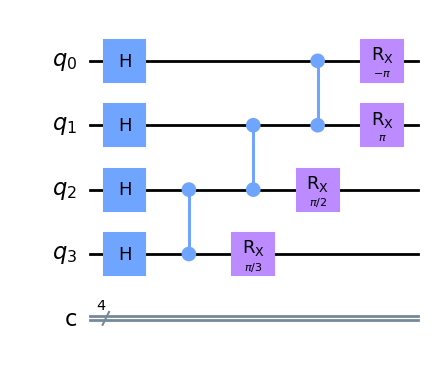

In [10]:
ansatz1([-np.pi, np.pi, np.pi/2, np.pi/3]).draw('mpl')

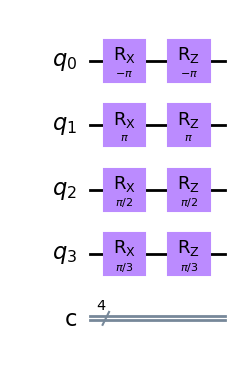

In [11]:
ansatz2(np.array([-np.pi, np.pi, np.pi/2, np.pi/3, -np.pi, np.pi, np.pi/2, np.pi/3])).draw('mpl')

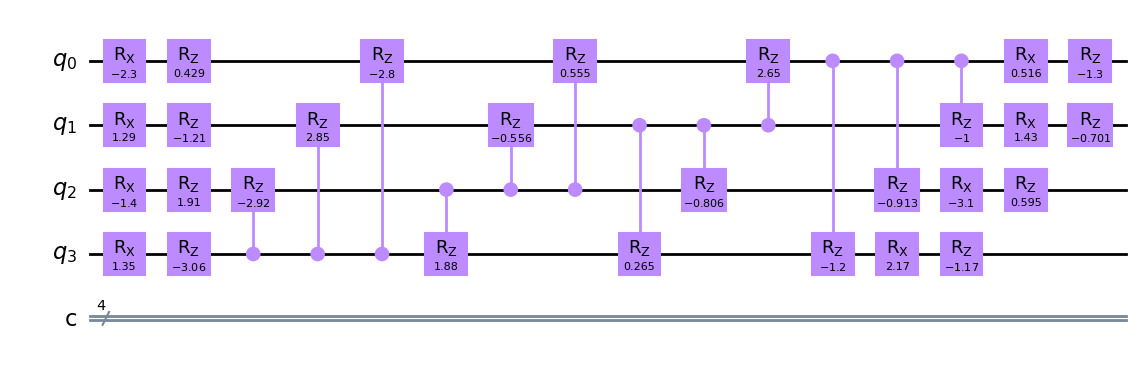

In [12]:
ansatz3(np.random.uniform(-np.pi, np.pi, 28)).draw('mpl')

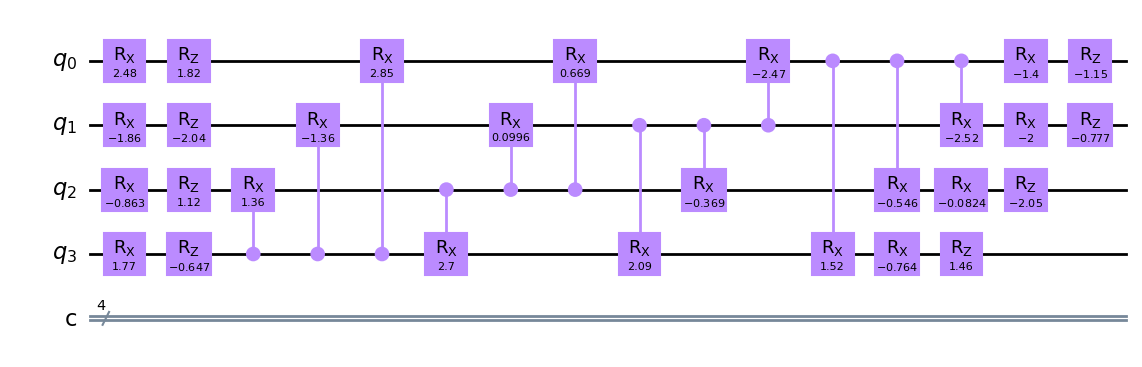

In [13]:
ansatz4(np.random.uniform(-np.pi, np.pi, 28)).draw('mpl')

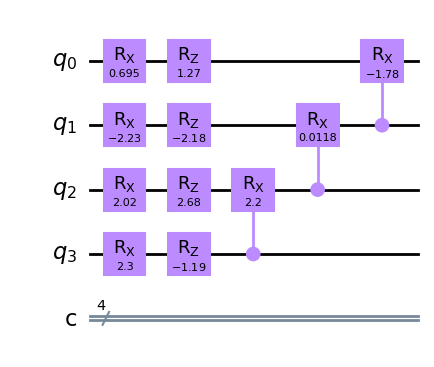

In [14]:
ansatz5(np.random.uniform(-np.pi, np.pi, 11)).draw('mpl')

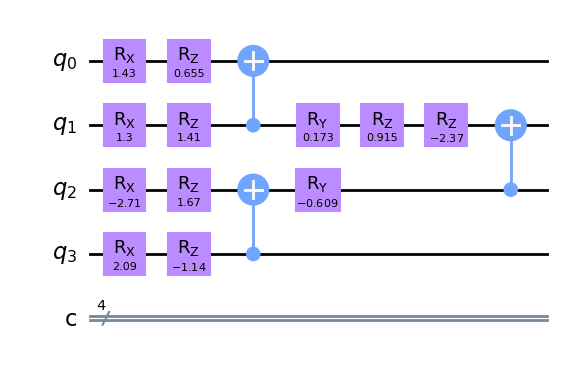

In [15]:
ansatz6(np.random.uniform(-np.pi, np.pi, 12)).draw('mpl')

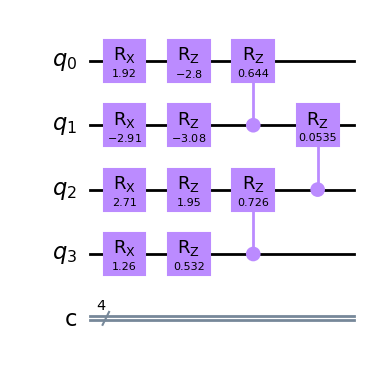

In [16]:
ansatz7(np.random.uniform(-np.pi, np.pi, 11)).draw('mpl')

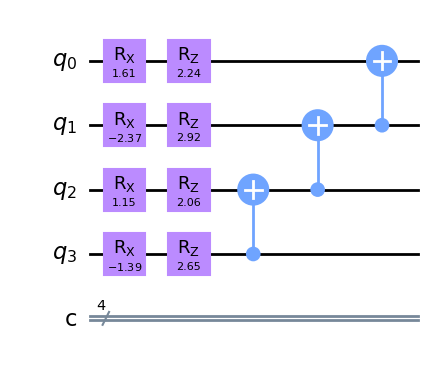

In [17]:
ansatz8(np.random.uniform(-np.pi, np.pi, 8)).draw('mpl')

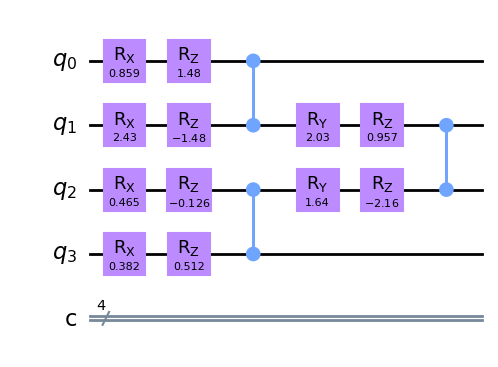

In [18]:
ansatz9(np.random.uniform(-np.pi, np.pi, 12)).draw('mpl')

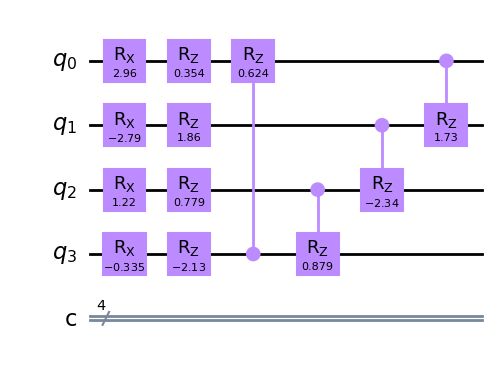

In [19]:
ansatz10(np.random.uniform(-np.pi, np.pi, 12)).draw('mpl')

# Medindo expressibilidade e emaranhamento dos circuitos

In [21]:
# Function to generate a random unitary matrix
def random_unitary(dim):
    """Generate a random unitary matrix of dimension dim using QR decomposition."""
    Z = np.random.randn(dim, dim) + 1j * np.random.randn(dim, dim)
    Q, R = np.linalg.qr(Z)
    d = np.diagonal(R)
    Q *= d / np.abs(d)
    return Q

# Haar Integral Calculation
def haar_integral(num_qubits, samples):
    """
    Return the calculation of Haar Integral for a specified number of samples.
    """
    N = 2 ** num_qubits
    randunit_density = np.zeros((N, N), dtype=complex)

    zero_state = np.zeros(N, dtype=complex)
    zero_state[0] = 1

    for _ in tqdm(range(samples), desc="Calculando Haar Integral"):
        # Generate random unitary
        unitary = random_unitary(N)
        # Apply unitary to the zero state
        A = np.matmul(zero_state, unitary).reshape(-1, 1)
        # Accumulate density matrix
        randunit_density += np.kron(A, A.conj().T)

    # Normalize by number of samples
    randunit_density /= samples
    return randunit_density

# PQC Integral Calculation
def pqc_integral(num_qubits, ansatze, size, samples):
    """
    Return the calculation of Integral for a PQC over uniformly sampled
    parameters θ for the specified number of samples.
    """
    N = num_qubits
    randunit_density = np.zeros((2 ** N, 2 ** N), dtype=complex)

    for _ in  tqdm(range(samples), desc="Calculando PQC Integral"):
        # Sample random parameters
        params = np.random.uniform(-np.pi, np.pi, size)
        # Create the ansatz circuit with the given parameters
        ansatz = ansatze(params)
        # Simulate the circuit to get the statevector
        statevector = Statevector.from_instruction(transpile(ansatz, Aer.get_backend("qasm_simulator")))
        # Reshape statevector to column vector
        U = statevector.data.reshape(-1, 1)
        # Accumulate density matrix
        randunit_density += np.kron(U, U.conj().T)

    # Normalize by number of samples
    return randunit_density / samples


In [22]:
np.linalg.norm(haar_integral(num_qubits, 2048) - pqc_integral(num_qubits, ansatz1, 4, 2048))

Calculando PQC Integral: 100%|██████████| 2048/2048 [00:07<00:00, 260.79it/s]


0.028383602646747778

In [23]:
np.linalg.norm(haar_integral(num_qubits, 2048) - pqc_integral(num_qubits, ansatz2, 8, 2048))

Calculando PQC Integral: 100%|██████████| 2048/2048 [00:07<00:00, 257.11it/s]


0.030036804633272882

In [24]:
np.linalg.norm(haar_integral(num_qubits, 2048) - pqc_integral(num_qubits, ansatz3, 28, 2048))

Calculando PQC Integral: 100%|██████████| 2048/2048 [00:25<00:00, 81.46it/s] 


0.030521999015187287

In [25]:
np.linalg.norm(haar_integral(num_qubits, 2048) - pqc_integral(num_qubits, ansatz4, 28, 2048))

Calculando PQC Integral: 100%|██████████| 2048/2048 [00:25<00:00, 81.01it/s]


0.03133302143323386

In [26]:
np.linalg.norm(haar_integral(num_qubits, 2048) - pqc_integral(num_qubits, ansatz5, 11, 2048))

Calculando PQC Integral: 100%|██████████| 2048/2048 [00:13<00:00, 153.27it/s]


0.02707188817626998

In [27]:
np.linalg.norm(haar_integral(num_qubits, 2048) - pqc_integral(num_qubits, ansatz6, 12, 2048))

Calculando PQC Integral: 100%|██████████| 2048/2048 [00:11<00:00, 179.28it/s]


0.030003376380786064

In [28]:
np.linalg.norm(haar_integral(num_qubits, 2048) - pqc_integral(num_qubits, ansatz7, 11, 2048))

Calculando PQC Integral: 100%|██████████| 2048/2048 [00:12<00:00, 164.41it/s]


0.029771707985923358

In [29]:
np.linalg.norm(haar_integral(num_qubits, 2048) - pqc_integral(num_qubits, ansatz8, 8, 2048))

Calculando PQC Integral: 100%|██████████| 2048/2048 [00:08<00:00, 237.09it/s]


0.03116213698405726

In [30]:
np.linalg.norm(haar_integral(num_qubits, 2048) - pqc_integral(num_qubits, ansatz9, 12, 2048))

Calculando PQC Integral: 100%|██████████| 2048/2048 [00:10<00:00, 204.61it/s]


0.03065114915199148

In [31]:
np.linalg.norm(haar_integral(num_qubits, 2048) - pqc_integral(num_qubits, ansatz10, 12, 2048))

Calculando PQC Integral: 100%|██████████| 2048/2048 [00:15<00:00, 130.48it/s]


0.029941394047440343

In [35]:
def meyer_wallach(circuit, num_qubits, size, sample=1024):

    """

        Returns the meyer-wallach entanglement measure for the given circuit.

    """


    res = np.zeros(sample, dtype=complex)

    N = num_qubits


    for i in range(sample):

        params = np.random.uniform(-np.pi, np.pi, size)

        ansatz = circuit(params)

        result = execute(ansatz,

                       backend=BasicAer.get_backend('statevector_simulator')).result()

        U = result.get_statevector(ansatz, decimals=5)

        entropy = 0

        qb = list(range(N))


        for j in range(N):

            dens = qiskit.quantum_info.partial_trace(U, qb[:j]+qb[j+1:]).data

            trace = np.trace(dens**2)

            entropy += trace


        entropy /= N

        res[i] = 1 - entropy



    return 2*np.sum(res).real/sample

In [38]:
meyer_wallach(ansatz1, num_qubits, 4)

<ipython-input-35-627c91265e0d>:21: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(ansatz,


1.000000146185986

In [39]:
meyer_wallach(ansatz2, num_qubits, 8)

<ipython-input-35-627c91265e0d>:21: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(ansatz,


0.5034274065424267

In [40]:
meyer_wallach(ansatz3, num_qubits, 28)

<ipython-input-35-627c91265e0d>:21: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(ansatz,


0.7070131168256806

In [41]:
meyer_wallach(ansatz4, num_qubits, 28)

<ipython-input-35-627c91265e0d>:21: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(ansatz,


0.8793025653702429

In [42]:
meyer_wallach(ansatz5, num_qubits, 11)

<ipython-input-35-627c91265e0d>:21: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(ansatz,


0.6442802670715869

In [43]:
meyer_wallach(ansatz6, num_qubits, 12)

<ipython-input-35-627c91265e0d>:21: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(ansatz,


0.7331270436807225

In [44]:
meyer_wallach(ansatz7, num_qubits, 11)

<ipython-input-35-627c91265e0d>:21: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(ansatz,


0.5024786381405257

In [45]:
meyer_wallach(ansatz8, num_qubits, 8)

<ipython-input-35-627c91265e0d>:21: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(ansatz,


0.7657803206590713

In [46]:
meyer_wallach(ansatz9, num_qubits, 12)

<ipython-input-35-627c91265e0d>:21: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(ansatz,


0.5987015572896541

In [47]:
meyer_wallach(ansatz10, num_qubits, 12)

<ipython-input-35-627c91265e0d>:21: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(ansatz,


0.496626858317099